In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from data_process import get_tasks_gsm_8k, get_tasks_asdiv

gsm_8k_tasks = get_tasks_gsm_8k()
asdiv_tasks = get_tasks_asdiv()
gsm_8k_df = pd.DataFrame(gsm_8k_tasks)
asdiv_df = pd.DataFrame(asdiv_tasks)

pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl
pg is kewl

In [43]:
gsm_8k_df['no_of_words'] = gsm_8k_df['Question'].apply(lambda x: len(x.split()))
asdiv_df['no_of_words'] = asdiv_df['Question'].apply(lambda x: len(x.split()))
gsm_8k_df['no_of_words'].describe(), asdiv_df['no_of_words'].describe()

(count    7473.000000
 mean       45.092600
 std        17.482279
 min         9.000000
 25%        33.000000
 50%        42.000000
 75%        54.000000
 max       183.000000
 Name: no_of_words, dtype: float64,
 count    2305.000000
 mean       30.711931
 std        11.435635
 min         9.000000
 25%        22.000000
 50%        28.000000
 75%        37.000000
 max        88.000000
 Name: no_of_words, dtype: float64)

In [44]:
gsm_8k_df.to_csv('gsm_8k.csv', index=False)
asdiv_df.to_csv('asdiv.csv', index=False)

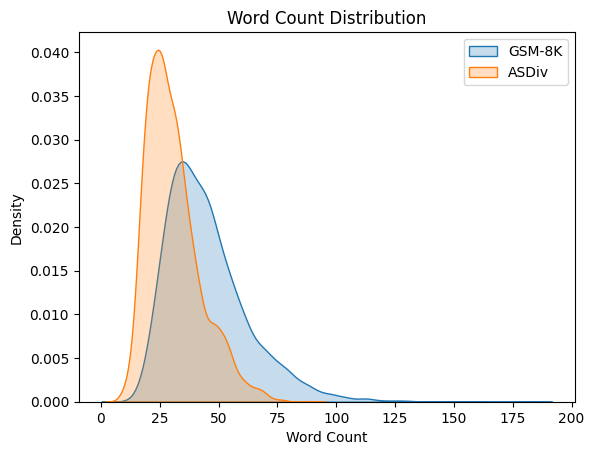

In [45]:
sns.kdeplot(data=gsm_8k_df, x="no_of_words", fill=True)

sns.kdeplot(data=asdiv_df, x="no_of_words", fill=True)
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Density")

plt.legend(["GSM-8K", "ASDiv"])

plt.savefig("Data Analysis/graphs/Word Count Distribution.png")
plt.show()

In [46]:
completion_data = pd.read_csv("Data Analysis/gsm_8k_analysis_4000.csv")
completion_data.head()

,Question,Answer,no_of_words,solo_cost,omni_cost,solo_correct,omni_correct
0,Natalia sold clips to 48 of her friends in Apr...,72.0,31,0.001313,0.000958,True,True
1,Weng earns $12 an hour for babysitting. Yester...,10.0,20,0.001606,0.001246,True,True
2,Betty is saving money for a new wallet which c...,5.0,50,0.002042,0.002055,True,True
3,"Julie is reading a 120-page book. Yesterday, s...",42.0,41,0.002069,0.001115,True,True
4,James writes a 3-page letter to 2 different fr...,624.0,20,0.001963,0.001499,True,False


In [47]:
completion_data.isna().sum()

Question           0
Answer             3
no_of_words        0
solo_cost       3472
omni_cost       3472
solo_correct    3472
omni_correct    3472
dtype: int64

In [48]:
cleaned_data = completion_data.dropna()
cleaned_data.isna().sum()

Question        0
Answer          0
no_of_words     0
solo_cost       0
omni_cost       0
solo_correct    0
omni_correct    0
dtype: int64

In [49]:
!pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


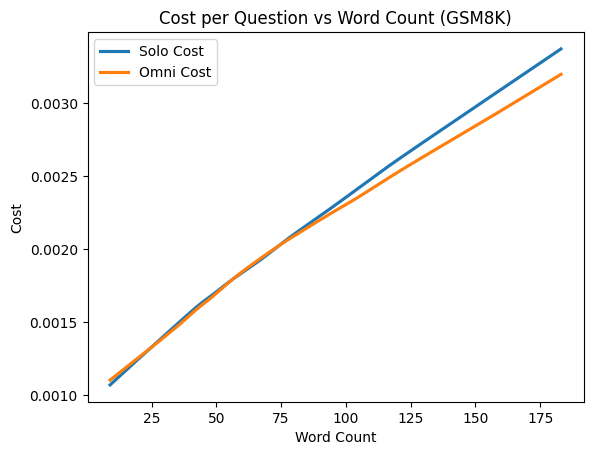

In [50]:
sns.regplot(data=cleaned_data, x="no_of_words", y="solo_cost", label="Solo Cost", scatter=False, lowess=True)
sns.regplot(data=cleaned_data, x="no_of_words", y="omni_cost", label="Omni Cost", scatter=False, lowess=True)
plt.title("Cost per Question vs Word Count (GSM8K)")
plt.xlabel("Word Count")
plt.ylabel("Cost")
plt.legend()
plt.savefig("Data Analysis/graphs/Cost Per Question vs Word Count (GSM8K).png")
plt.show()

/var/folders/mm/p6nmtghx1p1cg2s282w9mk3c0000gn/T/ipykernel_53024/95330654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['cost_per_1000_questions_solo'] = cleaned_data['solo_cost']*1000
/var/folders/mm/p6nmtghx1p1cg2s282w9mk3c0000gn/T/ipykernel_53024/95330654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['cost_per_1000_questions_omni'] = cleaned_data['omni_cost']*1000


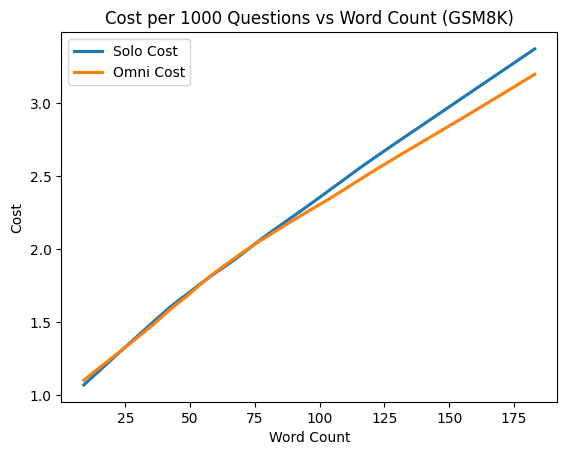

In [53]:
cleaned_data['cost_per_1000_questions_solo'] = cleaned_data['solo_cost']*1000
cleaned_data['cost_per_1000_questions_omni'] = cleaned_data['omni_cost']*1000

sns.regplot(data=cleaned_data, x="no_of_words", y="cost_per_1000_questions_solo", label="Solo Cost", scatter=False, lowess=True)
sns.regplot(data=cleaned_data, x="no_of_words", y="cost_per_1000_questions_omni", label="Omni Cost", scatter=False, lowess=True)
plt.title("Cost per 1000 Questions vs Word Count (GSM8K)")
plt.xlabel("Word Count")
plt.ylabel("Cost")
plt.legend()
plt.savefig("Data Analysis/graphs/Cost Per 1000 Questions vs Word Count (GSM8K).png")
plt.show()

In [54]:
cleaned_data.head()

,Question,Answer,no_of_words,solo_cost,omni_cost,solo_correct,omni_correct,cost_per_1000_questions_solo,cost_per_1000_questions_omni
0,Natalia sold clips to 48 of her friends in Apr...,72.0,31,0.001313,0.000958,True,True,1.3134,0.9581
1,Weng earns $12 an hour for babysitting. Yester...,10.0,20,0.001606,0.001246,True,True,1.6060,1.2463
2,Betty is saving money for a new wallet which c...,5.0,50,0.002042,0.002055,True,True,2.0416,2.0548
3,"Julie is reading a 120-page book. Yesterday, s...",42.0,41,0.002069,0.001115,True,True,2.0691,1.1154
4,James writes a 3-page letter to 2 different fr...,624.0,20,0.001963,0.001499,True,False,1.9635,1.4993


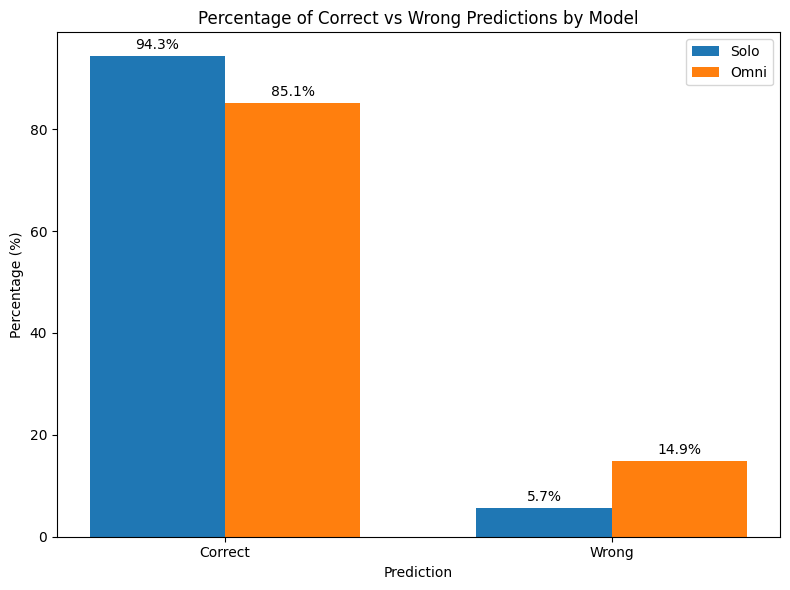

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Data counts for predictions
solo_correct = 3773
solo_wrong = 228
omni_correct = 3404
omni_wrong = 597
total = 4001

# Calculate percentages
solo_pct_correct = solo_correct/total * 100
solo_pct_wrong = solo_wrong/total * 100
omni_pct_correct = omni_correct/total * 100
omni_pct_wrong = omni_wrong/total * 100

# Data for grouped bar chart
categories = ['Correct', 'Wrong']
solo_data = [solo_pct_correct, solo_pct_wrong]
omni_data = [omni_pct_correct, omni_pct_wrong]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))
bars1 = ax.bar(x - width/2, solo_data, width, label='Solo')
bars2 = ax.bar(x + width/2, omni_data, width, label='Omni')

ax.set_xlabel('Prediction')
ax.set_ylabel('Percentage (%)')
ax.set_title('Percentage of Correct vs Wrong Predictions by Model')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.savefig("Data Analysis/graphs/Percentage of Correct vs Wrong Predictions by Omni and Solo.png")
plt.show()

/var/folders/mm/p6nmtghx1p1cg2s282w9mk3c0000gn/T/ipykernel_53024/4171030951.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['solo_correct_bool'] = cleaned_data['solo_correct'] == True
/var/folders/mm/p6nmtghx1p1cg2s282w9mk3c0000gn/T/ipykernel_53024/4171030951.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['omni_correct_bool'] = cleaned_data['omni_correct'] == True
/var/folders/mm/p6nmtghx1p1cg2s282w9mk3c0000gn/T/ipykernel_53024/4171030951.py:12: SettingWithCopyWarning: 
A 

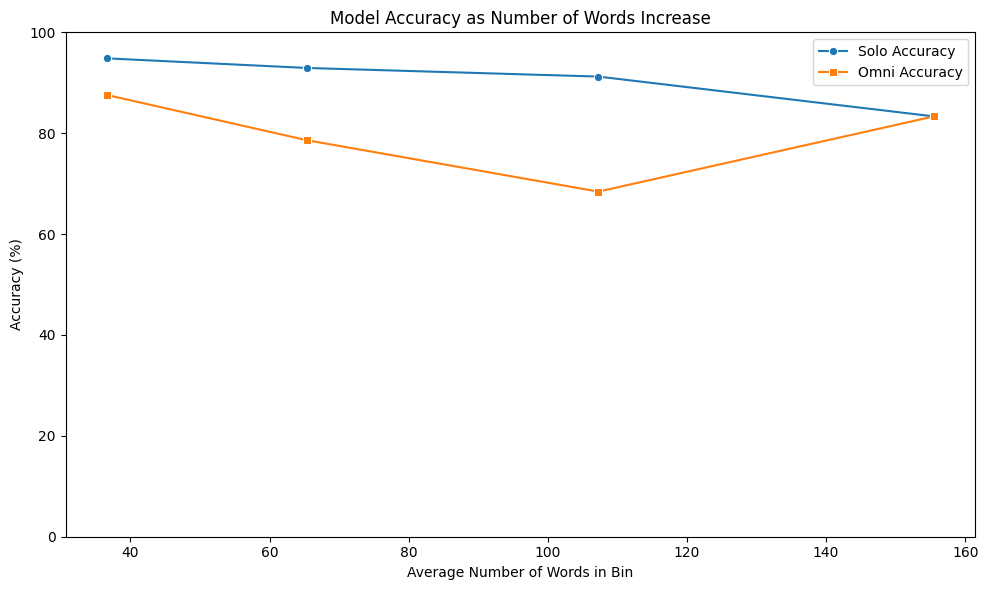

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure boolean columns (in case they are strings)
cleaned_data['solo_correct_bool'] = cleaned_data['solo_correct'] == True
cleaned_data['omni_correct_bool'] = cleaned_data['omni_correct'] == True

# Define bins based on number of words; adjust bin count as needed
bins = np.linspace(cleaned_data['no_of_words'].min(), cleaned_data['no_of_words'].max(), 5)
cleaned_data['words_bin'] = pd.cut(cleaned_data['no_of_words'], bins)

# Group by bin and compute average accuracy (as fraction)
bin_summary = cleaned_data.groupby('words_bin').agg({
    'solo_correct_bool': 'mean',
    'omni_correct_bool': 'mean',
    'no_of_words': 'mean'
}).reset_index()

# Multiply by 100 to convert to percentage
bin_summary['solo_accuracy'] = bin_summary['solo_correct_bool'] * 100
bin_summary['omni_accuracy'] = bin_summary['omni_correct_bool'] * 100

# Plot smooth line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=bin_summary, x='no_of_words', y='solo_accuracy', marker='o', label='Solo Accuracy')
sns.lineplot(data=bin_summary, x='no_of_words', y='omni_accuracy', marker='s', label='Omni Accuracy')

plt.xlabel('Average Number of Words in Bin')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy as Number of Words Increase')
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig('Data Analysis/graphs/Accuracy_vs_No_of_Words.png')
plt.show()

In [57]:
cleaned_data[cleaned_data['omni_correct'] & (~cleaned_data['solo_correct'])].shape

(34, 12)

In [58]:
cleaned_data[(~cleaned_data['omni_correct']) & (cleaned_data['solo_correct'])].shape

(403, 12)

In [59]:
cleaned_data[cleaned_data['omni_correct'] & (cleaned_data['solo_correct'])].shape

(3370, 12)

In [60]:
omni_correct_df = cleaned_data[cleaned_data['omni_correct']]
omni_correct_df.head()

,Question,Answer,no_of_words,solo_cost,omni_cost,solo_correct,omni_correct,cost_per_1000_questions_solo,cost_per_1000_questions_omni,solo_correct_bool,omni_correct_bool,words_bin
0,Natalia sold clips to 48 of her friends in Apr...,72.0,31,0.001313,0.000958,True,True,1.3134,0.9581,True,True,"(9.0, 52.5]"
1,Weng earns $12 an hour for babysitting. Yester...,10.0,20,0.001606,0.001246,True,True,1.6060,1.2463,True,True,"(9.0, 52.5]"
2,Betty is saving money for a new wallet which c...,5.0,50,0.002042,0.002055,True,True,2.0416,2.0548,True,True,"(9.0, 52.5]"
3,"Julie is reading a 120-page book. Yesterday, s...",42.0,41,0.002069,0.001115,True,True,2.0691,1.1154,True,True,"(9.0, 52.5]"
5,Mark has a garden with flowers. He planted pla...,35.0,53,0.001943,0.001751,True,True,1.9426,1.7512,True,True,"(52.5, 96.0]"


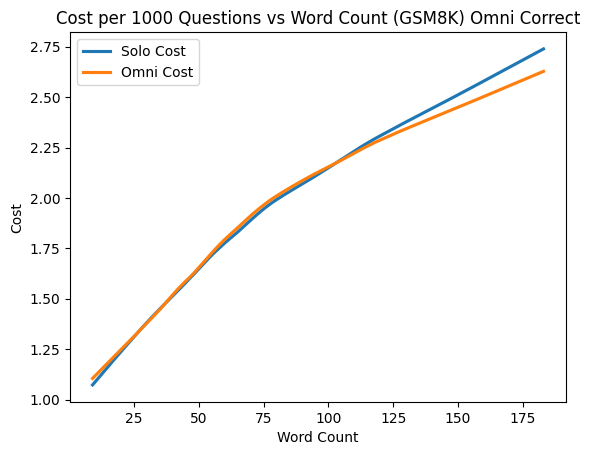

In [62]:
sns.regplot(data=omni_correct_df, x="no_of_words", y="cost_per_1000_questions_solo", label="Solo Cost", scatter=False, lowess=True)
sns.regplot(data=omni_correct_df, x="no_of_words", y="cost_per_1000_questions_omni", label="Omni Cost", scatter=False, lowess=True)
plt.title("Cost per 1000 Questions vs Word Count (GSM8K) Omni Correct")
plt.xlabel("Word Count")
plt.ylabel("Cost")
plt.legend()
plt.savefig("Data Analysis/graphs/Cost Per 1000 Questions vs Word Count (GSM8K) Omni Correct.png")
plt.show()